In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge

In [45]:
def calculate_average_distance(data_points, center):
    distance_list= []
    for point in data_points:
        #distance = np.linalg.norm(point, center)
        distance = point - center
        distance_list.append(distance)
    return sum(distance_list)/len(distance_list)

In [92]:
def transforminput(param, center, sigma):
    newinput = np.zeros((len(param), len(center))).astype('float32')
    for i in range(len(param)):
        for j in range(len(center)):
            newinput[i,j] = np.exp(-(np.sum((param[i] - center[j])**2.0)**0.5) / sigma[j]**2.0)
    return newinput

In [6]:
data = pd.read_csv('./data/combined_data_v1.csv', index_col= 0)
data.tail()

,Mx,My,Mz,Pot1,Pot2
688,-219.661472,-308.806823,-193.512572,350,814
689,-220.938574,-305.664262,-186.522321,350,816
690,-218.514853,-306.379091,-187.183863,352,815
691,-219.938574,-310.806823,-176.512572,352,815
692,-220.360311,-313.664262,-181.512572,350,814


In [13]:
X = data.loc[:,['Mx', 'My', 'Mz']]
y = data.loc[:,['Pot1', 'Pot2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [36]:
X_train.head()

,Mx,My,Mz
45,-258.367610,-120.804464,-217.665306
611,-278.360311,-134.099836,-222.183863
458,-235.054745,-145.134473,-138.844079
341,-243.241155,-235.429606,-146.734501
11,-225.496788,-315.216381,-205.262488


In [18]:
kmeans = KMeans(n_clusters=25, random_state=1).fit(X_train)
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-235.78306903, -152.82938853, -125.67932908],
       [-283.08162987, -306.2353847 ,  -97.38559604],
       [-312.62201272, -500.65934913, -137.32989354],
       [-280.50626517, -134.29596   , -220.06665047],
       [-231.81790738, -284.04406306, -145.19662185],
       [-256.69848367,  -72.17174492, -139.41992923],
       [-150.00773264, -215.22782029, -115.57880032],
       [-271.55721621, -388.33332551, -162.59091123],
       [-216.00078562, -310.72334452, -198.6328351 ],
       [-316.44622233, -116.83731874, -134.18443269],
       [-252.82519725, -236.03738529, -209.00595296],
       [-196.28040587, -105.87078213, -129.31523195],
       [-297.89619644, -197.65588825, -125.12190775],
       [-336.84038702, -387.08506269, -148.97479142],
       [-219.07650182, -209.28563118, -116.71358986],
       [-283.09709166,  -71.79471419, -172.76836925],
       [-275.69785111, -337.27047172, -179.67873946],
       [-177.17815364, -160.53803286, -122.39532347],
       [-289.99779736, -279.

In [33]:
cluster_labels = kmeans.labels_
print(cluster_labels)
print()
print(X_train.index)

[ 3  3  0 24  8  2 15  6  4  4 19 17 17 15 23 22 19  4 15  7  1 22 15 10
  0  8  2 11  4 14  4 24 22 11  5  8  3 14 17  6  4 24 11  2 11  6  3 14
 15 12 14 10  5  5 11 14  7  5 14 13  8 18  4  8  3  0  2  4  3 14  7  2
 14  7 14  4 19  9  7 17 12 17 15  8  5  4 14  7 10 19  6 15  2  6 14  5
  4  7 21  6  6  1 21 16 18  7 16  2  7  6 10  0  6  3 11  0 13  3 12 15
 20  1  8 20  5  7 14  8 12  3  1  8  2  6  3  3 15 22 19 14 15 19  7  5
 20  4 17 24  0 23  3 14 10  6 13  2  5 10  4  2 15 16  7 13 10  0 15 11
 23 11 23  1  8 21  0 10 19  3  6  1  6 19 15  2  4 19 22 10  1 16  3 14
 12  6 11  6  4 19  8 11 11 14  2  9  9 15  9  5 13 18 10  8  6  2 11  4
  1 12  1 12 14  8  6 15  9  3  3 10  8 17  6  1  2 17  1  6  2 11 11  2
  5  3 24  3 20  0 13 11  2 14  3  2  4  2  7 22  0 17  6  5  2  5 20  8
 13  3 15 15 22  8 10  8  6  1 18 11  4 14 13  5 22  3 23 21  4  3 20 16
  6  7  1 14 14 18 18  3  2 12 18  1  6  1  4 19  7 13  4  0  8 17  1  9
 22  4  1  8  1  3  7 18  3 14  1  7 15  4 16  6 21

In [37]:
X_train_with_cluster_labels = pd.concat([X_train, pd.DataFrame(cluster_labels, columns= ['cluster_label'], index = X_train.index)], axis = 1)

X_train_with_cluster_labels.head()

,Mx,My,Mz,cluster_label
45,-258.367610,-120.804464,-217.665306,3
611,-278.360311,-134.099836,-222.183863,3
458,-235.054745,-145.134473,-138.844079,0
341,-243.241155,-235.429606,-146.734501,24
11,-225.496788,-315.216381,-205.262488,8


In [57]:
cluster_0 = X_train_with_cluster_labels.loc[ X_train_with_cluster_labels.cluster_label == 0 ]
cluster_0.head()

,Mx,My,Mz,cluster_label
458,-235.054745,-145.134473,-138.844079,0
459,-225.223560,-175.721743,-121.626564,0
439,-230.753464,-146.547851,-130.408149,0
427,-230.714799,-168.547851,-119.408149,0
411,-241.434482,-157.961876,-120.968596,0


In [83]:


sigma = []

for i, center in enumerate(cluster_centers):
    cluster = X_train_with_cluster_labels.loc[ X_train_with_cluster_labels.cluster_label == i ]
    distance = []
    for j,point in cluster.iterrows():
        point_array = np.array([point.Mx, point.My, point.Mz])
        distance.append(np.linalg.norm(center - point_array))
    
    distance.sort()
    
    if(len(distance)>10):
        sigma.append(sum(distance[:10])/10)
    else:
        sigma.append(sum(distance)/len(distance))
        # distance = np.linalg.norm(center,point[:3])
        # print(np.array(point[:3]))
        # print(type(point))
        # print(center)
        # print(type(center))
        # print()
print(sigma)

[14.405179315620899, 14.154945987511857, 6.020036555998876, 7.903988861602412, 4.99551469377029, 11.91535751136043, 6.770081084963174, 6.199485813782382, 8.25531003646875, 18.51482401880987, 15.993746635833237, 8.202834518174935, 16.601229987577113, 12.335402697038393, 9.18307444371998, 10.205397778748683, 22.072541961703106, 12.827604159076206, 23.352007253469026, 7.094426416033715, 16.847200693792075, 14.609124636136045, 14.270507115854787, 22.426514622092245, 16.373682682304228]


In [84]:
X_train.shape

(554, 3)

In [90]:
X_train_numpy_array = X_train.to_numpy()

In [93]:
Ridge_X_train = transforminput(X_train_numpy_array, cluster_centers, sigma)
Ridge_X_train.shape

(554, 25)

In [94]:
Ridge_y_train = y_train.to_numpy()
Ridge_y_train.shape

(554, 2)

In [96]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(Ridge_X_train, Ridge_y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [98]:
ridge_model.score(Ridge_X_train, Ridge_y_train)

0.879738480619803

In [97]:
X_test_numpy_array = X_test.to_numpy()
Ridge_y_test = y_test.to_numpy()
Ridge_X_test = transforminput(X_test_numpy_array, cluster_centers, sigma)
ridge_model.score(Ridge_X_test, Ridge_y_test)

0.8150215362030196

In [105]:
test_predictions = ridge_model.predict(Ridge_X_test)
test_predictions_df = pd.DataFrame(test_predictions, columns = ['Pot1_prediction', 'Pot2_prediction'], index = y_test.index)
test_predictions_df.head()

,Pot1_prediction,Pot2_prediction
600,364.820251,817.657104
23,449.229614,901.561279
214,393.654419,693.421082
677,348.741913,810.471558
47,404.882935,836.288940


In [104]:
y_test.head()

,Pot1,Pot2
600,343,822
23,473,920
214,394,702
677,350,806
47,486,821


In [108]:
prediction_and_true_value_test = pd.concat([y_test, test_predictions_df], axis = 1)
prediction_and_true_value_test.head()

,Pot1,Pot2,Pot1_prediction,Pot2_prediction
600,343,822,364.820251,817.657104
23,473,920,449.229614,901.561279
214,394,702,393.654419,693.421082
677,350,806,348.741913,810.471558
47,486,821,404.882935,836.288940


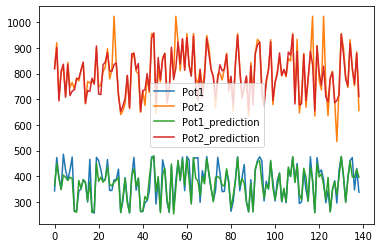

In [124]:
prediction_and_true_value_test.index= range(y_test.shape[0])
prediction_and_true_value_test.plot()